In [1]:
import pandas as pd
import os
import re
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_path = 'D:\\Data\\text_summarization\\'

In [3]:
def count_words(row):
    return len(re.findall(r'\w+', row.description)), len(re.findall(r'\w+', row.content))

# HVG

In [4]:
df_hvg = pd.read_csv(data_path + 'hvg.csv', index_col=0)
df_hvg.shape

(643109, 7)

In [5]:
df_hvg.head()

,title,description,tags,published_time,modified_time,section,content
0,Orbán: 100 milliárdos áfa-visszaigénylést tart...,Orbán Viktor szerint a kormány úgy próbálja me...,NaN,2004-11-11 16:29:00+00:00,2004-12-02 10:28:26+00:00,Adó rovat,"""Ma nyíltan lehet Magyarországon arról beszéln..."
1,Kovácsot adóügyekben hallgatja az EP,"A meghallgatás elején Kovács jelezte, hogy a r...",NaN,2004-11-16 09:23:00+00:00,2004-12-02 10:42:20+00:00,Adó rovat,Az Európai Unió tagországainak adópolitikáját ...
2,KPMG: adórendszerünk nem erősíti versenyképess...,A KPMG könyvvizsgáló és tanácsadó cég tapaszta...,NaN,2004-11-16 13:16:00+00:00,2004-12-02 10:34:25+00:00,Adó rovat,"Robert Stöllinger, a magyarországi KPMG ügyvez..."
3,Draskovics szerint EU-konform az eva,A pénzügyi tárca szerint az egyszerűsített vál...,NaN,2004-11-21 08:07:00+00:00,2004-12-02 10:57:50+00:00,Adó rovat,A pénzügyminiszter szerint az egyeztetések az ...
4,Kártyát kapnak az APEH ügyfelei,Az Adó- és Pénzügyi Ellenőrzési Hivatal decemb...,NaN,2004-12-06 18:09:22+00:00,2004-12-06 18:16:17+00:00,Adó rovat,A következő év januárjától Magyarország több m...


In [6]:
summary_word_counts, content_word_counts = [], []
for _, row in tqdm(df_hvg.iterrows(), total=df_hvg.shape[0]):
    sc, cc = count_words(row)
    summary_word_counts.append(sc)
    content_word_counts.append(cc)
df_word_counts = pd.DataFrame({'summary_word_count': summary_word_counts,
                               'content_word_count': content_word_counts})
df_hvg = pd.concat([df_hvg, df_word_counts], axis=1)

In [7]:
df_hvg['summary_ratio'] = df_hvg.summary_word_count / df_hvg.content_word_count

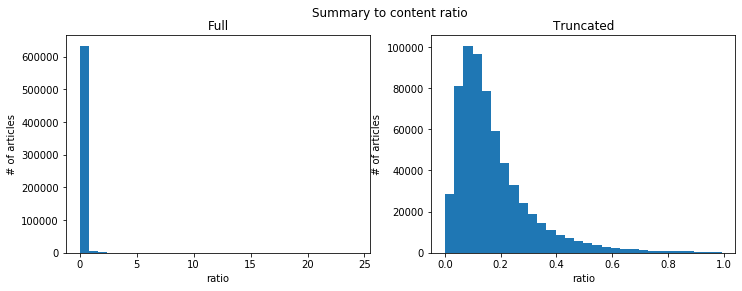

In [8]:
plt.figure(figsize=(12,4))
plt.suptitle('Summary to content ratio')
ratios = df_hvg.summary_ratio[~np.isnan(df_hvg.summary_ratio)][~np.isinf(df_hvg.summary_ratio)]

plt.subplot(121)
plt.title('Full')
plt.xlabel('ratio')
plt.ylabel('# of articles')
plt.hist(ratios, bins=30);

plt.subplot(122)
plt.title('Truncated')
plt.xlabel('ratio')
plt.ylabel('# of articles')
plt.hist(ratios[ratios < 1.], bins=30);

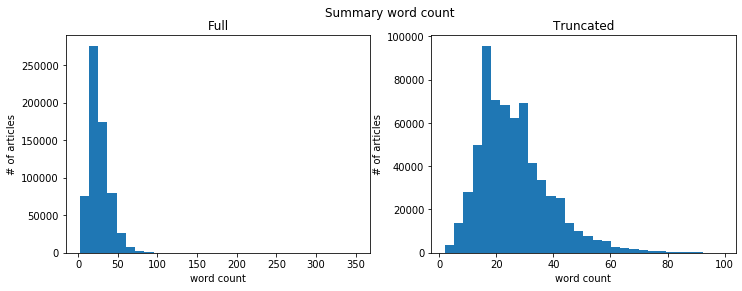

In [9]:
plt.figure(figsize=(12,4))
plt.suptitle('Summary word count')

plt.subplot(121)
plt.title('Full')
plt.xlabel('word count')
plt.ylabel('# of articles')
plt.hist(df_hvg.summary_word_count, bins=30);

plt.subplot(122)
plt.title('Truncated')
plt.xlabel('word count')
plt.ylabel('# of articles')
plt.hist(df_hvg[df_hvg.summary_word_count < 100].summary_word_count, bins=30);

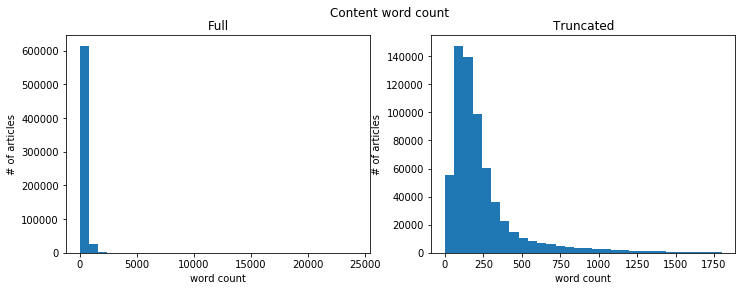

In [10]:
plt.figure(figsize=(12,4))
plt.suptitle('Content word count')

plt.subplot(121)
plt.title('Full')
plt.xlabel('word count')
plt.ylabel('# of articles')
plt.hist(df_hvg.content_word_count, bins=30);

plt.subplot(122)
plt.title('Truncated')
plt.xlabel('word count')
plt.ylabel('# of articles')
plt.hist(df_hvg[df_hvg.content_word_count < 1800].content_word_count, bins=30);

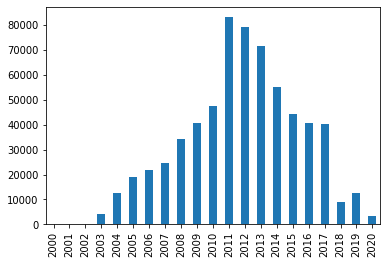

In [11]:
df_hvg.published_time = pd.to_datetime(df_hvg.published_time, utc=True)
years = df_hvg.published_time.dt.to_period('Y')
years.value_counts().sort_index().plot(kind='bar');